In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import Adam
from keras.layers.recurrent import LSTM

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [2]:
import pandas as pd

TARGET_LYING = 1
TARGET_SITTING = 1
TARGET_STAND = 1
TARGET_FALL = 0
TARGET_NO_FALL = 1

TARGET_DIM = 2

def handleData(datas):
    d = pd.concat(datas, axis=0)
    ds = pd.DataFrame(d, columns=d.columns[:-1])
    tx = ds
    ty = to_categorical(d['target'], TARGET_DIM)
    return (tx, ty)

In [3]:
#將資料分成訓練組及測試組
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import *

# main data
df_lying = pd.read_csv('mdata/rows/finale/lying.csv')
df_lying['target'] = TARGET_LYING
df_sitting = pd.read_csv('mdata/rows/finale/sitting.csv')
df_sitting['target'] = TARGET_SITTING
df_stand = pd.read_csv('mdata/rows/finale/stand.csv')
df_stand['target'] = TARGET_STAND
df_fall = pd.read_csv('mdata/rows/finale/fall.csv')
df_fall['target'] = TARGET_FALL

# # ohter
# df_db_fall = pd.read_csv('mdata/rows/db/fall.csv')
# df_db_fall['target'] = TARGET_FALL

# test data
df_sitting_test = pd.read_csv('mdata/rows/bed_test/sitting.csv')
df_sitting_test['target'] = TARGET_SITTING
df_fall_test = pd.read_csv('mdata/rows/bed_test/fall.csv')
df_fall_test['target'] = TARGET_FALL
df_stand_test = pd.read_csv('mdata/rows/bed_test/stand.csv')
df_stand_test['target'] = TARGET_STAND

df_add_fall = pd.read_csv('mdata/rows/BedTest-fall.csv')
df_add_fall['target'] = TARGET_FALL
df_add_no_fall = pd.read_csv('mdata/rows/BedTest-no-fall.csv')
df_add_no_fall['target'] = TARGET_NO_FALL

# data split
X, y = handleData([df_fall, df_stand, df_sitting, df_lying, df_sitting_test, df_fall_test, df_stand_test, df_add_fall, df_add_no_fall]) #2
#3 X, y = handleData([df_sitting_test, df_fall_test, df_stand_test, df_add_fall, df_add_no_fall])
# X, y = handleData([df_fall, df_stand, df_sitting, df_lying, df_db_fall])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=39)

In [4]:
def build_model_1():
    model = Sequential()
    model.add(Dense(64, input_shape=(54, ), activation='tanh'))
    model.add(Dense(32, activation='tanh'))
    model.add(Dense(16, activation='tanh'))
    model.add(Dense(8, activation='tanh'))
    model.add(Dense(4, activation='tanh'))
    model.add(Dense(TARGET_DIM, activation='softmax'))
    return model
# def build_model_2():
#     model = Sequential()
#     model.add(LSTM(64, input_dim=(None, 54), return_sequences=True))
#     model.add(LSTM(128, return_sequences=False))
#     model.add(Dense(32, activation='tanh'))
#     model.add(Dense(16, activation='tanh'))
#     model.add(Dense(8, activation='tanh'))
#     model.add(Dense(4, activation='tanh'))
#     model.add(Dense(TARGET_DIM, activation='softmax'))
#     return model

In [5]:
model = build_model_1()
model.summary()
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                3520      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 10        
Total params: 6,310
Trainable params: 6,310
Non-trainable params: 0
_________________________________________________

In [6]:
#開始訓練模型
# y_train = y_train[:, :, np.newaxis]
# y_test = y_test[:, :, np.newaxis]
train_history = model.fit(X_train, y_train, batch_size=X_train.shape[0], validation_data=(X_test, y_test), epochs=1500, verbose=0)
#顯示訓練結果
score = model.evaluate(X_train, y_train)
print ('Train Acc:', score[1])
score = model.evaluate(X_test, y_test)
print ('Test Acc:', score[1])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

2137/2137 [==============================] - 0s 88us/step
Train Acc: 0.9822180627047262
535/535 [==============================] - 0s 88us/step
Test Acc: 0.9439252336448598


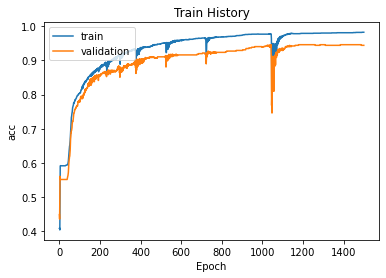

In [7]:
# 定義繪出精準率與誤差函數
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

show_train_history(train_history, 'acc', 'val_acc')

In [8]:
model.save('mdata/model/model_2')